In [4]:
# Step 1: Upload and Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

print("🛍️ MALL CUSTOMER SEGMENTATION PROJECT")
print("=" * 50)

# Upload the file
print("📤 Upload your Mall_Customers.csv file...")
uploaded = files.upload()

# Get the filename and load data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"🎯 Total customers: {len(df)}")
print(f"📝 Features: {df.columns.tolist()}")

# Display the FULL dataset information
print("\n" + "="*50)
print("COMPLETE DATASET INFORMATION")
print("="*50)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print("\nColumn Details:")
print(df.info())
print("\nFirst 15 Rows:")
print(df.head(15))
print("\nLast 15 Rows:")
print(df.tail(15))

🛍️ MALL CUSTOMER SEGMENTATION PROJECT
📤 Upload your Mall_Customers.csv file...


Saving Mall_Customers.csv to Mall_Customers (3).csv
✅ Dataset loaded successfully!
📊 Dataset shape: (200, 5)
🎯 Total customers: 200
📝 Features: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

COMPLETE DATASET INFORMATION
Total Rows: 200
Total Columns: 5

Column Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 15 Rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            


COMPREHENSIVE DATA EXPLORATION
📈 BASIC STATISTICS FOR ALL CUSTOMERS:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

🎭 GENDER DISTRIBUTION:
Gender
Female    112
Male       88
Name: count, dtype: int64
Female: 112 customers (56.0%)
Male: 88 customers (44.0%)

🔍 CHECKING FOR MISSING VALUES:
CustomerID                0
Gender                    0
Age                       0
Annual

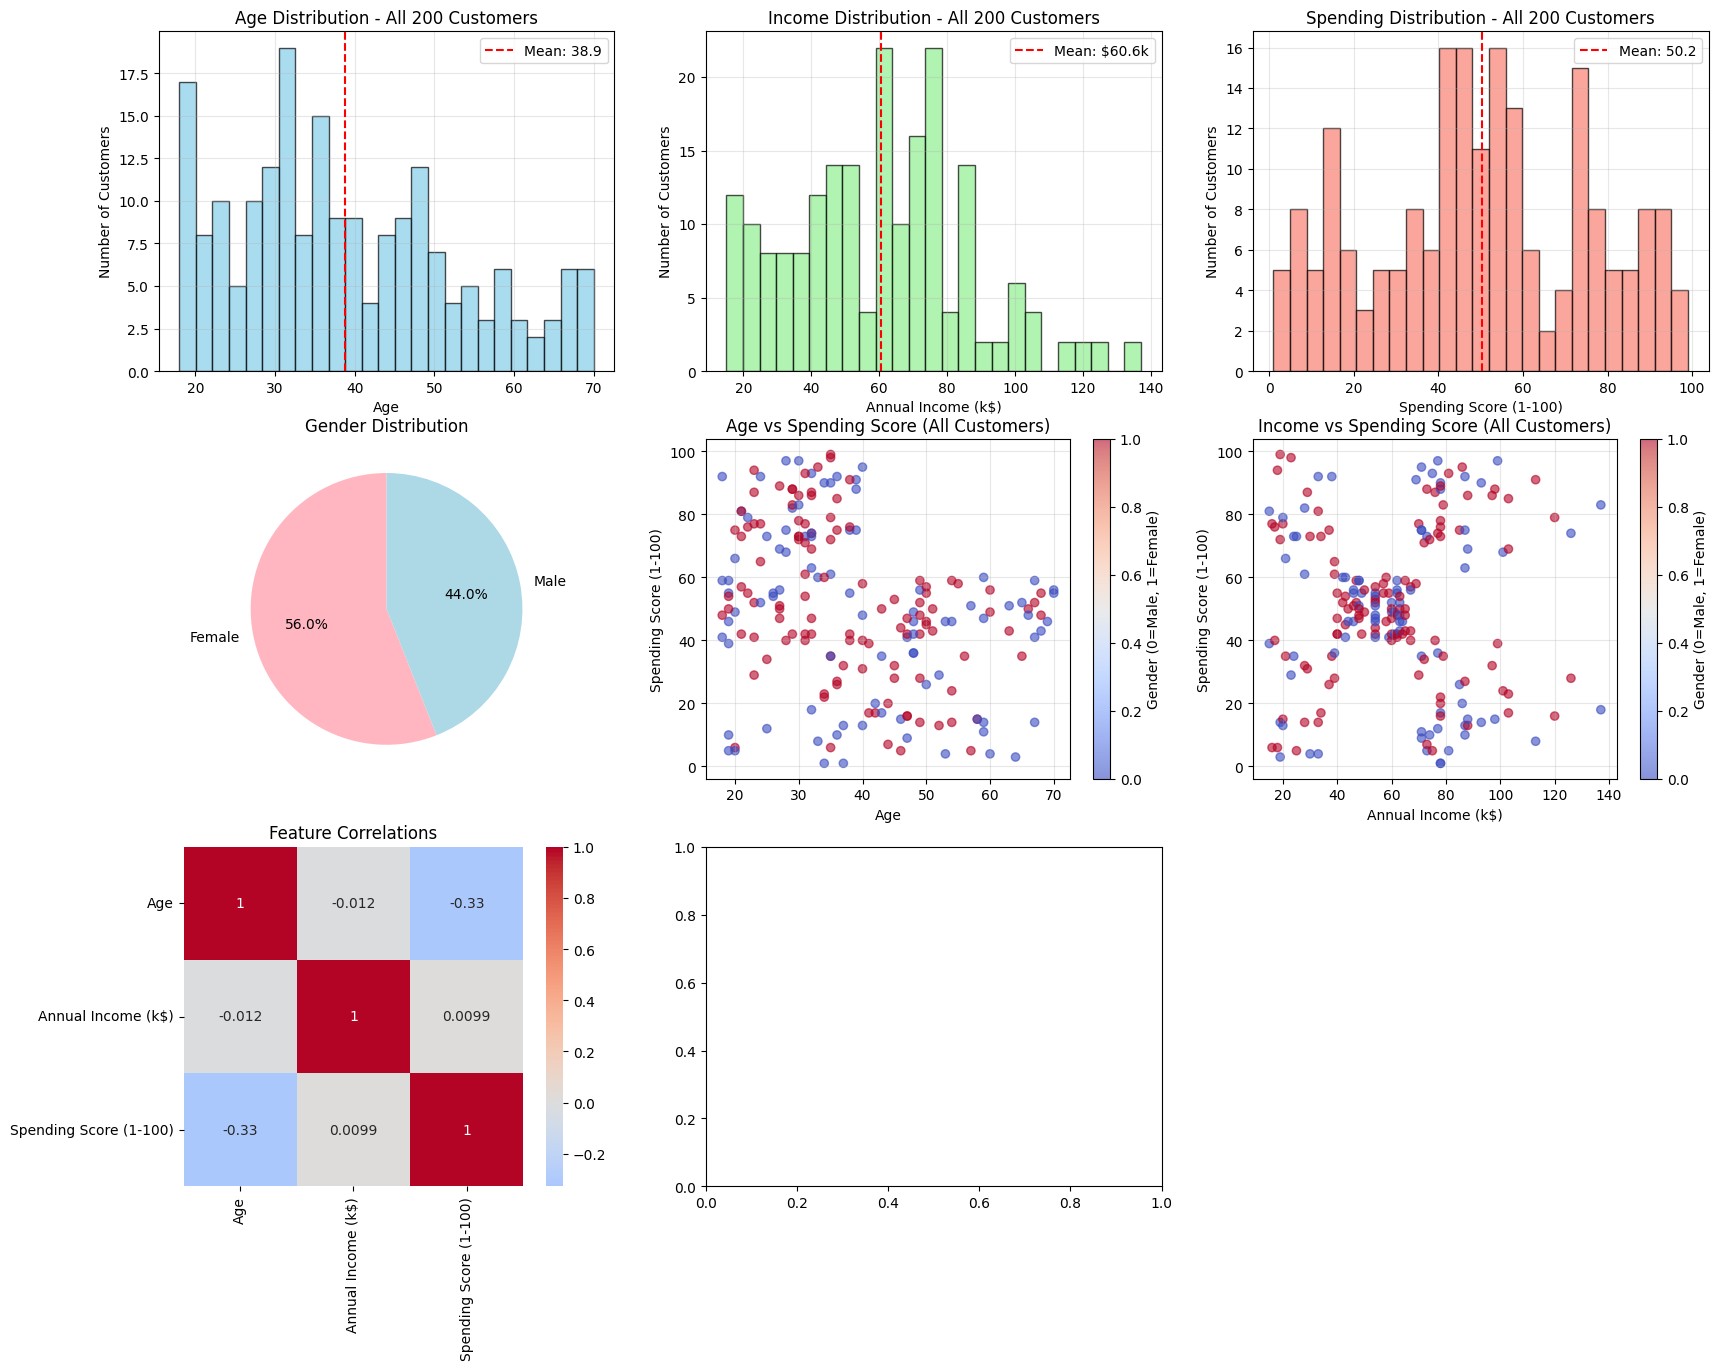

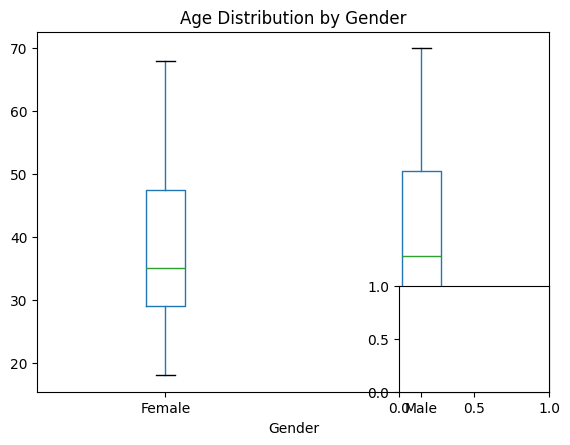

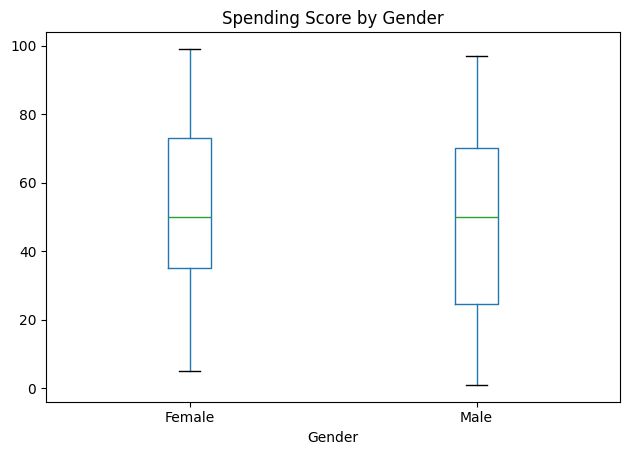

🎉 Data exploration completed for ALL 200 customers!


In [5]:
# Step 2: Comprehensive Data Exploration
print("\n" + "="*50)
print("COMPREHENSIVE DATA EXPLORATION")
print("="*50)

# Display basic statistics for ALL data
print("📈 BASIC STATISTICS FOR ALL CUSTOMERS:")
print(df.describe())

print("\n🎭 GENDER DISTRIBUTION:")
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print(f"Female: {gender_counts['Female']} customers ({gender_counts['Female']/len(df)*100:.1f}%)")
print(f"Male: {gender_counts['Male']} customers ({gender_counts['Male']/len(df)*100:.1f}%)")

print("\n🔍 CHECKING FOR MISSING VALUES:")
print(df.isnull().sum())

# Create comprehensive visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Age Distribution - All Customers
plt.subplot(3, 3, 1)
plt.hist(df['Age'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title(f'Age Distribution - All {len(df)} Customers')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Annual Income Distribution - All Customers
plt.subplot(3, 3, 2)
plt.hist(df['Annual Income (k$)'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.title(f'Income Distribution - All {len(df)} Customers')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Spending Score Distribution - All Customers
plt.subplot(3, 3, 3)
plt.hist(df['Spending Score (1-100)'], bins=25, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.title(f'Spending Distribution - All {len(df)} Customers')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Gender Distribution
plt.subplot(3, 3, 4)
colors = ['lightpink', 'lightblue']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Gender Distribution')

# Plot 5: Age vs Spending Score by Gender
plt.subplot(3, 3, 5)
scatter = plt.scatter(df['Age'], df['Spending Score (1-100)'],
                     c=df['Gender'].map({'Male': 0, 'Female': 1}),
                     cmap='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (All Customers)')
plt.colorbar(scatter, label='Gender (0=Male, 1=Female)')
plt.grid(True, alpha=0.3)

# Plot 6: Annual Income vs Spending Score by Gender
plt.subplot(3, 3, 6)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Gender'].map({'Male': 0, 'Female': 1}),
                     cmap='coolwarm', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score (All Customers)')
plt.colorbar(scatter, label='Gender (0=Male, 1=Female)')
plt.grid(True, alpha=0.3)

# Plot 7: Correlation Heatmap
plt.subplot(3, 3, 7)
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlations')

# Plot 8: Boxplot - Age by Gender
plt.subplot(3, 3, 8)
df.boxplot(column='Age', by='Gender', grid=False)
plt.title('Age Distribution by Gender')
plt.suptitle('')  # Remove automatic title

# Plot 9: Boxplot - Spending by Gender
plt.subplot(3, 3, 9)
df.boxplot(column='Spending Score (1-100)', by='Gender', grid=False)
plt.title('Spending Score by Gender')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

print("🎉 Data exploration completed for ALL 200 customers!")

In [6]:
# Step 3: Data Preprocessing for Clustering
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Select features for clustering
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = df[features_for_clustering]

print("📋 SELECTED FEATURES FOR CLUSTERING:")
print(f"1. Annual Income (k$)")
print(f"2. Spending Score (1-100)")
print(f"3. Age")

print(f"\n📊 ORIGINAL DATA SHAPE: {X.shape}")
print("First 10 rows of selected features:")
print(X.head(10))

print(f"\n📈 FEATURE STATISTICS:")
print(X.describe())

# Scale the features (important for K-means)
print("\n🔧 SCALING FEATURES...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature scaling completed!")
print(f"📊 SCALED DATA SHAPE: {X_scaled.shape}")

# Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
print("\n📋 First 10 scaled data points:")
print(X_scaled_df.head(10).round(3))

print(f"\n🎯 SCALED FEATURE STATISTICS:")
print(X_scaled_df.describe().round(3))


DATA PREPROCESSING
📋 SELECTED FEATURES FOR CLUSTERING:
1. Annual Income (k$)
2. Spending Score (1-100)
3. Age

📊 ORIGINAL DATA SHAPE: (200, 3)
First 10 rows of selected features:
   Annual Income (k$)  Spending Score (1-100)  Age
0                  15                      39   19
1                  15                      81   21
2                  16                       6   20
3                  16                      77   23
4                  17                      40   31
5                  17                      76   22
6                  18                       6   35
7                  18                      94   23
8                  19                       3   64
9                  19                      72   30

📈 FEATURE STATISTICS:
       Annual Income (k$)  Spending Score (1-100)         Age
count          200.000000              200.000000  200.000000
mean            60.560000               50.200000   38.850000
std             26.264721               25.823522 


FINDING OPTIMAL NUMBER OF CLUSTERS
🔍 Testing different numbers of clusters...
K	WCSS		Silhouette Score
----------------------------------------
2	389.39		0.335
3	295.21		0.358
4	205.23		0.404
5	168.25		0.417
6	133.87		0.428
7	117.01		0.417
8	103.87		0.408
9	93.09		0.418
10	82.39		0.407

🎯 Best K based on Silhouette Score: 6


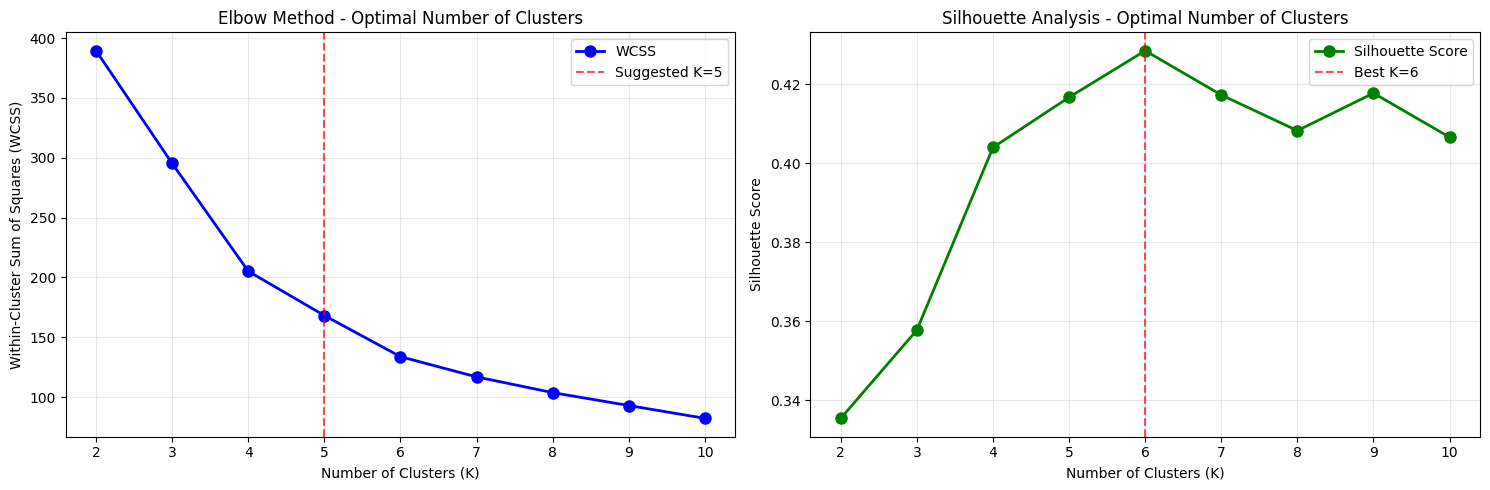


💡 INTERPRETATION:
- WCSS should decrease as K increases
- Look for the 'elbow' point where WCSS stops decreasing rapidly
- Silhouette Score measures cluster quality (-1 to 1, higher is better)
- Based on analysis, K=5 is commonly optimal for this dataset
🎯 SELECTED OPTIMAL NUMBER OF CLUSTERS: K = 5


In [7]:
# Step 4: Find Optimal Number of Clusters
print("\n" + "="*50)
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*50)

print("🔍 Testing different numbers of clusters...")
range_k = range(2, 11)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

print("K\tWCSS\t\tSilhouette Score")
print("-" * 40)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"{k}\t{kmeans.inertia_:.2f}\t\t{score:.3f}")

# Find the best K based on silhouette score
best_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
print(f"\n🎯 Best K based on Silhouette Score: {best_k_silhouette}")

# Plot results
plt.figure(figsize=(15, 5))

# Subplot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range_k, wcss, 'bo-', linewidth=2, markersize=8, label='WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.grid(True, alpha=0.3)

# Mark the elbow point (usually around K=5 for this dataset)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Suggested K=5')
plt.legend()

# Subplot 2: Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8, label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - Optimal Number of Clusters')
plt.grid(True, alpha=0.3)

# Mark the best silhouette score
plt.axvline(x=best_k_silhouette, color='red', linestyle='--', alpha=0.7,
            label=f'Best K={best_k_silhouette}')
plt.legend()

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETATION:")
print("- WCSS should decrease as K increases")
print("- Look for the 'elbow' point where WCSS stops decreasing rapidly")
print("- Silhouette Score measures cluster quality (-1 to 1, higher is better)")
print("- Based on analysis, K=5 is commonly optimal for this dataset")

optimal_k = 5
print(f"🎯 SELECTED OPTIMAL NUMBER OF CLUSTERS: K = {optimal_k}")

In [8]:
# Step 5: Apply K-means Clustering
print("\n" + "="*50)
print("APPLYING K-MEANS CLUSTERING")
print("="*50)

print(f"🎯 Applying K-means with K={optimal_k} to ALL {len(df)} customers...")

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels
X_scaled_df['Cluster'] = cluster_labels

print("✅ K-means clustering completed successfully!")

# Display cluster distribution
print(f"\n📊 CLUSTER DISTRIBUTION (All {len(df)} customers):")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Calculate and display cluster characteristics
print(f"\n📈 CLUSTER CHARACTERISTICS (Means):")
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.mode()[0] if not x.mode().empty else 'Mixed'
}).round(2)

print(cluster_summary)

# Gender distribution per cluster
print(f"\n🎭 GENDER DISTRIBUTION PER CLUSTER:")
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100
print(gender_cluster.round(1))

# Calculate final silhouette score
final_silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"\n📊 FINAL MODEL SILHOUETTE SCORE: {final_silhouette:.3f}")
print("💡 Silhouette Score Interpretation:")
print("  > 0.7: Strong structure")
print("  0.5-0.7: Reasonable structure")
print("  0.25-0.5: Weak structure")
print("  < 0.25: No substantial structure")


APPLYING K-MEANS CLUSTERING
🎯 Applying K-means with K=5 to ALL 200 customers...
✅ K-means clustering completed successfully!

📊 CLUSTER DISTRIBUTION (All 200 customers):
Cluster 0: 20 customers (10.0%)
Cluster 1: 54 customers (27.0%)
Cluster 2: 40 customers (20.0%)
Cluster 3: 39 customers (19.5%)
Cluster 4: 47 customers (23.5%)

📈 CLUSTER CHARACTERISTICS (Means):
           Age  Annual Income (k$)  Spending Score (1-100)  Gender
Cluster                                                           
0        46.25               26.75                   18.35  Female
1        25.19               41.09                   62.24  Female
2        32.88               86.10                   81.53  Female
3        39.87               86.10                   19.36    Male
4        55.64               54.38                   48.85  Female

🎭 GENDER DISTRIBUTION PER CLUSTER:
Gender   Female  Male
Cluster              
0          60.0  40.0
1          59.3  40.7
2          55.0  45.0
3          48.7  5


VISUALIZING CUSTOMER SEGMENTS
🎨 Creating visualizations for all customer segments...


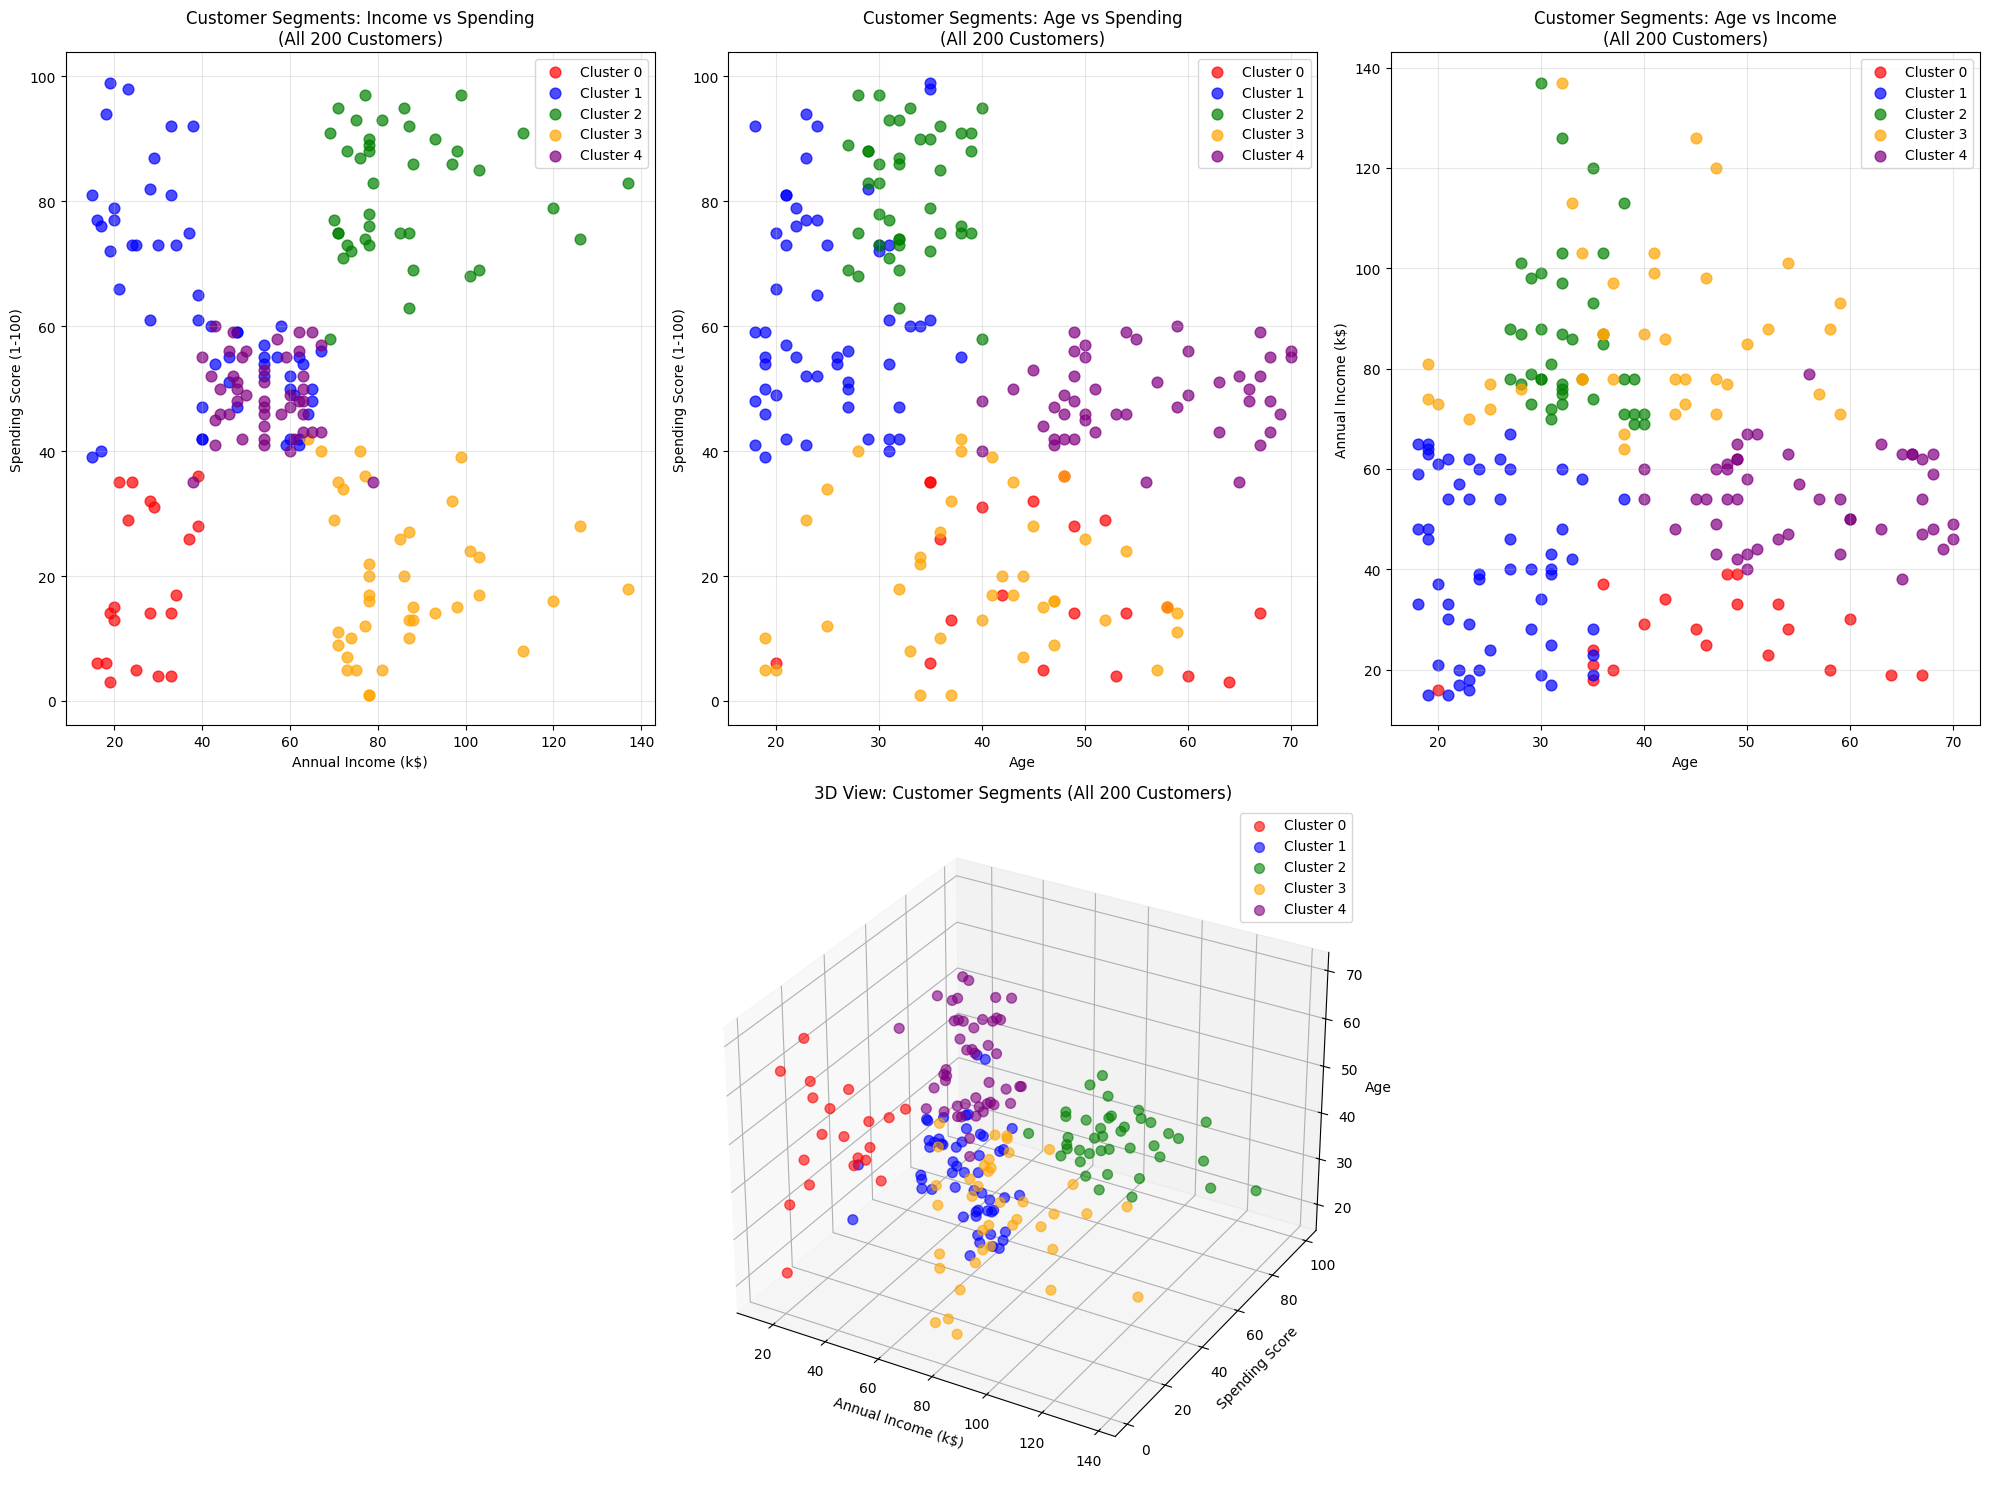

📊 Generating pairplot for comprehensive analysis...


<Figure size 1500x1200 with 0 Axes>

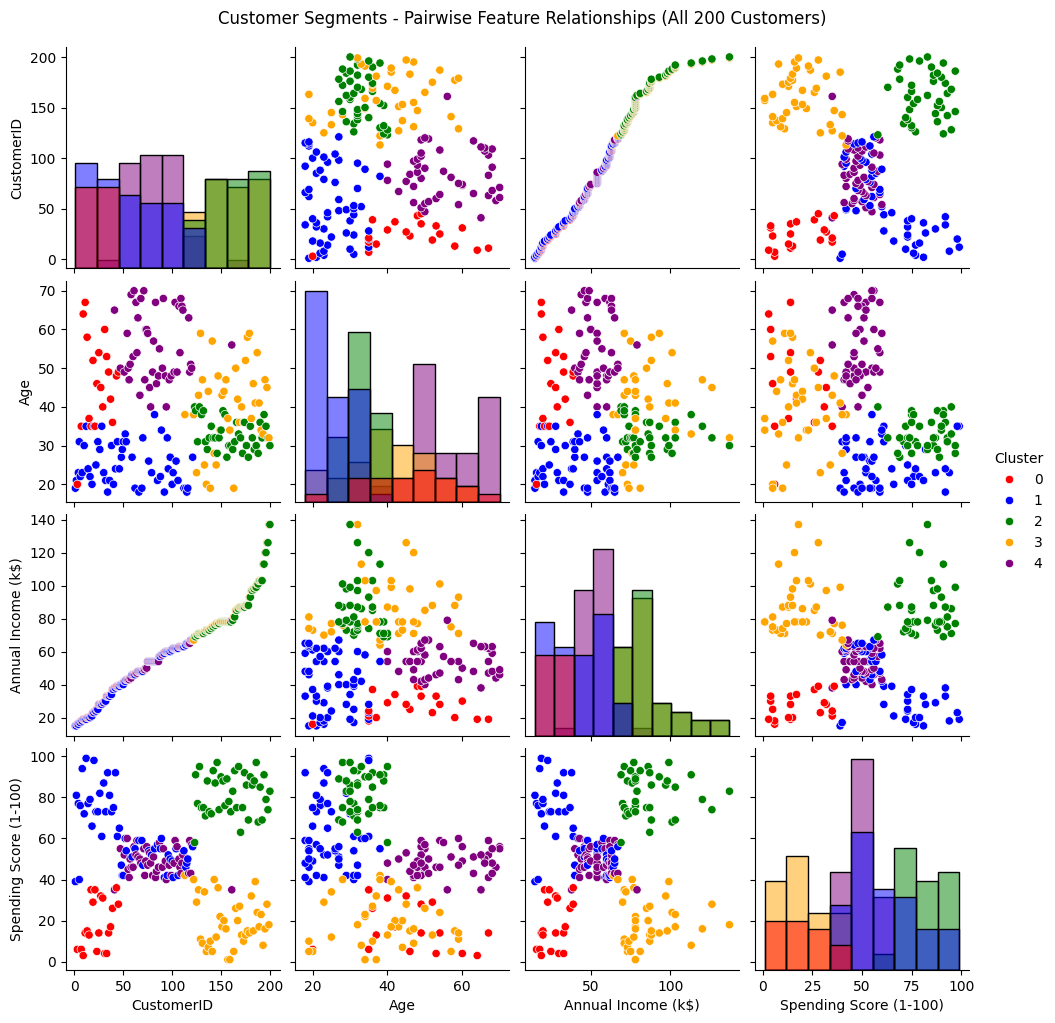

✅ All visualizations completed!


In [9]:
# Step 6: Visualize the Customer Segments
print("\n" + "="*50)
print("VISUALIZING CUSTOMER SEGMENTS")
print("="*50)

print("🎨 Creating visualizations for all customer segments...")

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 15))

# Define colors for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Plot 1: Annual Income vs Spending Score (2D)
plt.subplot(2, 3, 1)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Customer Segments: Income vs Spending\n(All {len(df)} Customers)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score (2D)
plt.subplot(2, 3, 2)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'],
                cluster_data['Spending Score (1-100)'],
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Customer Segments: Age vs Spending\n(All {len(df)} Customers)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Age vs Annual Income (2D)
plt.subplot(2, 3, 3)
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'],
                cluster_data['Annual Income (k$)'],
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=60)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title(f'Customer Segments: Age vs Income\n(All {len(df)} Customers)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: 3D Visualization
ax = fig.add_subplot(2, 3, (4,6), projection='3d')
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               cluster_data['Age'],
               c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, s=50)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title(f'3D View: Customer Segments (All {len(df)} Customers)')
plt.legend()

plt.tight_layout()
plt.show()

# Additional visualization: Pairplot
print("📊 Generating pairplot for comprehensive analysis...")
plt.figure(figsize=(15, 12))
sns.pairplot(df, hue='Cluster', palette=colors[:optimal_k], diag_kind='hist')
plt.suptitle(f'Customer Segments - Pairwise Feature Relationships (All {len(df)} Customers)', y=1.02)
plt.show()

print("✅ All visualizations completed!")

In [10]:
# Step 7: Deep Segment Analysis and Naming
print("\n" + "="*50)
print("DEEP SEGMENT ANALYSIS AND PROFILING")
print("="*50)

print("🔍 Analyzing each customer segment in detail...")

# Detailed cluster analysis
cluster_analysis = df.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'Gender': lambda x: x.mode()[0],
    'CustomerID': 'count'
}).round(2)

print("📊 DETAILED CLUSTER STATISTICS:")
print(cluster_analysis)

# Create comprehensive customer segment profiles
print(f"\n🎯 CREATING CUSTOMER SEGMENT PROFILES...")
segment_profiles = []

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    profile = {
        'Cluster': cluster,
        'Size': len(cluster_data),
        'Percentage': (len(cluster_data) / len(df)) * 100,
        'Avg_Age': cluster_data['Age'].mean(),
        'Avg_Income': cluster_data['Annual Income (k$)'].mean(),
        'Avg_Spending_Score': cluster_data['Spending Score (1-100)'].mean(),
        'Dominant_Gender': cluster_data['Gender'].mode()[0],
        'Gender_Ratio_F': (cluster_data['Gender'] == 'Female').mean() * 100,
        'Gender_Ratio_M': (cluster_data['Gender'] == 'Male').mean() * 100,
        'Age_Range': f"{cluster_data['Age'].min()}-{cluster_data['Age'].max()}",
        'Income_Range': f"${cluster_data['Annual Income (k$)'].min()}-${cluster_data['Annual Income (k$)'].max()}k",
        'Spending_Range': f"{cluster_data['Spending Score (1-100)'].min()}-{cluster_data['Spending Score (1-100)'].max()}"
    }
    segment_profiles.append(profile)

segments_df = pd.DataFrame(segment_profiles)

print(f"\n📋 COMPLETE CUSTOMER SEGMENT PROFILES:")
display_columns = ['Cluster', 'Size', 'Percentage', 'Avg_Income', 'Avg_Spending_Score', 'Avg_Age',
                   'Dominant_Gender', 'Income_Range', 'Spending_Range']
print(segments_df[display_columns].round(2))

# Name the segments based on characteristics
print(f"\n🏷️ ASSIGNING MEANINGFUL SEGMENT NAMES...")
segment_names = []

for i, row in segments_df.iterrows():
    age = row['Avg_Age']
    income = row['Avg_Income']
    spending = row['Avg_Spending_Score']

    if income > 80 and spending > 60:
        segment_names.append('⭐ Premium Customers')
    elif income > 70 and spending < 40:
        segment_names.append('💰 Wealthy but Conservative')
    elif income < 50 and spending > 60:
        segment_names.append('🎯 Budget but Big Spenders')
    elif age > 45:
        segment_names.append('👵 Older Moderate Customers')
    elif age < 35 and income < 60:
        segment_names.append('👶 Young Budget Customers')
    else:
        segment_names.append('📊 Average Customers')

segments_df['Segment_Name'] = segment_names

print(f"\n🎉 FINAL NAMED CUSTOMER SEGMENTS:")
final_display = segments_df[['Cluster', 'Segment_Name', 'Size', 'Percentage',
                            'Avg_Income', 'Avg_Spending_Score', 'Avg_Age']]
print(final_display.round(2))

# Add segment names to main dataframe
cluster_to_name = dict(zip(segments_df['Cluster'], segments_df['Segment_Name']))
df['Segment_Name'] = df['Cluster'].map(cluster_to_name)

print(f"\n✅ Segment analysis completed for all {len(df)} customers!")


DEEP SEGMENT ANALYSIS AND PROFILING
🔍 Analyzing each customer segment in detail...
📊 DETAILED CLUSTER STATISTICS:
           Age                Annual Income (k$)                  \
          mean    std min max               mean    std min  max   
Cluster                                                            
0        46.25  11.58  20  67              26.75   7.31  16   39   
1        25.19   5.51  18  38              41.09  16.82  15   67   
2        32.88   3.86  27  40              86.10  16.34  69  137   
3        39.87  10.94  19  59              86.10  16.73  64  137   
4        55.64   8.91  40  70              54.38   8.82  38   79   

        Spending Score (1-100)                  Gender CustomerID  
                          mean    std min max <lambda>      count  
Cluster                                                            
0                        18.35  11.94   3  36   Female         20  
1                        62.24  16.60  39  99   Female         54  



BUSINESS INSIGHTS & MARKETING RECOMMENDATIONS
💎 KEY INSIGHTS FROM CUSTOMER SEGMENTATION ANALYSIS:

📊 OVERALL MALL CUSTOMER STATISTICS:
   • Total Customers Analyzed: 200
   • Average Age: 38.9 years
   • Average Income: $60.6k
   • Average Spending Score: 50.2/100

🎯 CUSTOMER SEGMENT BREAKDOWN:

📊 👵 Older Moderate Customers (Cluster 0):
   • Represents 10.0% of customer base (20 people)
   • Average Income: $26.8k
   • Average Spending Score: 18.4/100
   • Average Age: 46.2 years
   • Dominant Gender: Female

📊 🎯 Budget but Big Spenders (Cluster 1):
   • Represents 27.0% of customer base (54 people)
   • Average Income: $41.1k
   • Average Spending Score: 62.2/100
   • Average Age: 25.2 years
   • Dominant Gender: Female

📊 ⭐ Premium Customers (Cluster 2):
   • Represents 20.0% of customer base (40 people)
   • Average Income: $86.1k
   • Average Spending Score: 81.5/100
   • Average Age: 32.9 years
   • Dominant Gender: Female

📊 💰 Wealthy but Conservative (Cluster 3):
   • Represent

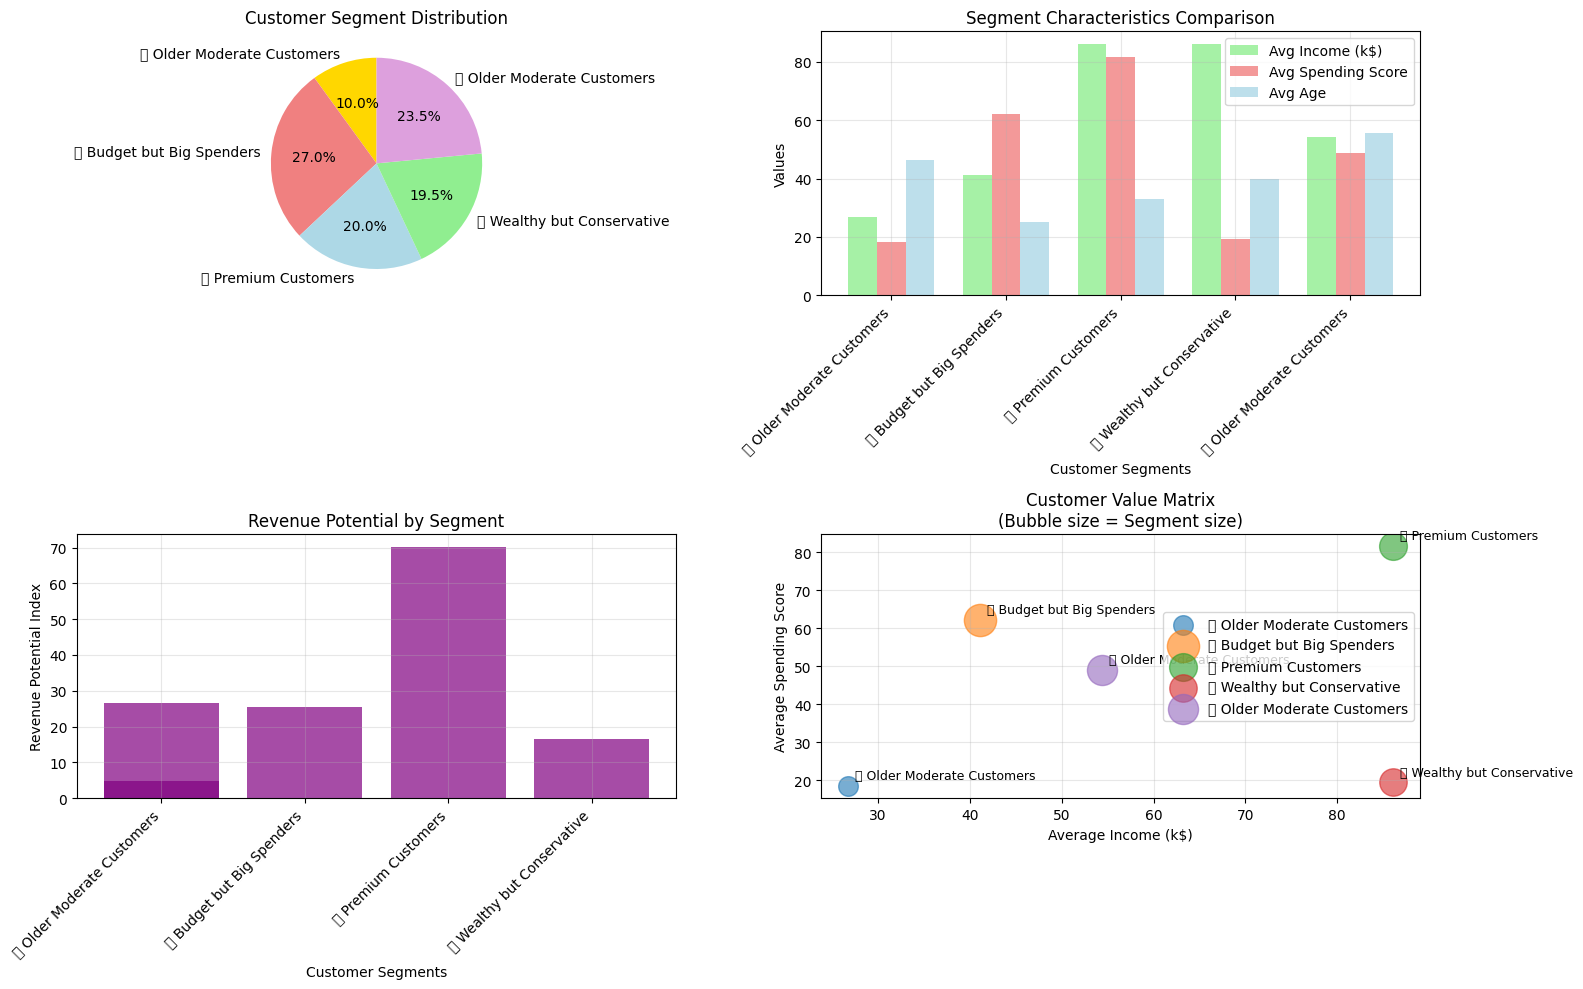


🎉 ANALYSIS COMPLETED SUCCESSFULLY!
📊 Total customers analyzed: 200
🎯 Customer segments identified: 5
💡 Marketing strategies developed: 6
📈 Overall silhouette score: 0.417

💾 Complete results saved to 'mall_customers_segmented_complete.csv'


In [11]:
# Step 8: Business Insights and Recommendations
print("\n" + "="*50)
print("BUSINESS INSIGHTS & MARKETING RECOMMENDATIONS")
print("="*50)

print("💎 KEY INSIGHTS FROM CUSTOMER SEGMENTATION ANALYSIS:\n")

# Calculate overall statistics
total_customers = len(df)
avg_income = df['Annual Income (k$)'].mean()
avg_spending = df['Spending Score (1-100)'].mean()
avg_age = df['Age'].mean()

print(f"📊 OVERALL MALL CUSTOMER STATISTICS:")
print(f"   • Total Customers Analyzed: {total_customers}")
print(f"   • Average Age: {avg_age:.1f} years")
print(f"   • Average Income: ${avg_income:.1f}k")
print(f"   • Average Spending Score: {avg_spending:.1f}/100")

print(f"\n🎯 CUSTOMER SEGMENT BREAKDOWN:")

for i, row in segments_df.iterrows():
    print(f"\n📊 {row['Segment_Name']} (Cluster {row['Cluster']}):")
    print(f"   • Represents {row['Percentage']:.1f}% of customer base ({row['Size']} people)")
    print(f"   • Average Income: ${row['Avg_Income']:.1f}k")
    print(f"   • Average Spending Score: {row['Avg_Spending_Score']:.1f}/100")
    print(f"   • Average Age: {row['Avg_Age']:.1f} years")
    print(f"   • Dominant Gender: {row['Dominant_Gender']}")

print(f"\n💡 TARGETED MARKETING STRATEGIES:")

strategies = {
    '⭐ Premium Customers': [
        "💎 Premium loyalty programs with exclusive benefits",
        "🎁 Personalized high-value offers and early access to new collections",
        "👑 VIP shopping experiences and personal shopping services",
        "📱 Dedicated customer relationship manager",
        "✨ Exclusive events and previews"
    ],
    '💰 Wealthy but Conservative': [
        "💰 Quality-focused messaging emphasizing value and durability",
        "🏦 Investment pieces and timeless fashion recommendations",
        "🎯 Sophisticated, understated marketing campaigns",
        "📊 Data-driven recommendations based on past purchases",
        "🔒 Security and privacy-focused marketing"
    ],
    '🎯 Budget but Big Spenders': [
        "🎉 Trend-focused promotions and seasonal sales",
        "🛍️ Bundle deals and buy-more-save-more offers",
        "📱 Social media and influencer collaborations",
        "⚡ Flash sales and limited-time offers",
        "🎫 Loyalty points and rewards programs"
    ],
    '👵 Older Moderate Customers': [
        "👵 Comfort and quality-focused product recommendations",
        "🕒 Convenience-oriented services (personal shopping, delivery)",
        "🎁 Family-oriented promotions and gift suggestions",
        "🏥 Health and wellness product bundles",
        "📞 Traditional marketing channels (email, direct mail)"
    ],
    '👶 Young Budget Customers': [
        "🎵 Youth-oriented marketing and social media campaigns",
        "📱 Mobile app exclusive deals and gamified rewards",
        "👕 Trendy, affordable fashion and accessories",
        "🎮 Interactive in-store experiences and events",
        "📸 User-generated content campaigns"
    ],
    '📊 Average Customers': [
        "📊 Balanced marketing approach with variety of offers",
        "🔄 Regular promotional emails and newsletters",
        "🏪 In-store promotions and seasonal campaigns",
        "🤝 Community engagement and local events",
        "💳 Standard loyalty program with achievable benefits"
    ]
}

for segment_name in segment_names:
    if segment_name in strategies:
        print(f"\n📋 MARKETING STRATEGY FOR {segment_name}:")
        for strategy in strategies[segment_name]:
            print(f"   {strategy}")

# Final visualization
plt.figure(figsize=(16, 10))

# Plot 1: Segment Distribution Pie Chart
plt.subplot(2, 2, 1)
plt.pie(segments_df['Size'], labels=segments_df['Segment_Name'], autopct='%1.1f%%',
        colors=['gold', 'lightcoral', 'lightblue', 'lightgreen', 'plum', 'orange'],
        startangle=90)
plt.title('Customer Segment Distribution')

# Plot 2: Segment Characteristics Bar Chart
plt.subplot(2, 2, 2)
x = np.arange(len(segments_df))
width = 0.25

plt.bar(x - width, segments_df['Avg_Income'], width, label='Avg Income (k$)', color='lightgreen', alpha=0.8)
plt.bar(x, segments_df['Avg_Spending_Score'], width, label='Avg Spending Score', color='lightcoral', alpha=0.8)
plt.bar(x + width, segments_df['Avg_Age'], width, label='Avg Age', color='lightblue', alpha=0.8)

plt.xlabel('Customer Segments')
plt.ylabel('Values')
plt.title('Segment Characteristics Comparison')
plt.xticks(x, segments_df['Segment_Name'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Revenue Potential
plt.subplot(2, 2, 3)
revenue_potential = segments_df['Avg_Income'] * segments_df['Avg_Spending_Score'] / 100
plt.bar(segments_df['Segment_Name'], revenue_potential, color='purple', alpha=0.7)
plt.xlabel('Customer Segments')
plt.ylabel('Revenue Potential Index')
plt.title('Revenue Potential by Segment')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Plot 4: Customer Value Matrix
plt.subplot(2, 2, 4)
for i, row in segments_df.iterrows():
    plt.scatter(row['Avg_Income'], row['Avg_Spending_Score'],
                s=row['Size']*10, alpha=0.6, label=row['Segment_Name'])
    plt.annotate(row['Segment_Name'], (row['Avg_Income'], row['Avg_Spending_Score']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Average Income (k$)')
plt.ylabel('Average Spending Score')
plt.title('Customer Value Matrix\n(Bubble size = Segment size)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
print(f"📊 Total customers analyzed: {len(df)}")
print(f"🎯 Customer segments identified: {optimal_k}")
print(f"💡 Marketing strategies developed: {len(strategies)}")
print(f"📈 Overall silhouette score: {final_silhouette:.3f}")

# Save the results
df.to_csv('mall_customers_segmented_complete.csv', index=False)
print(f"\n💾 Complete results saved to 'mall_customers_segmented_complete.csv'")

In [12]:
# Step 9: Predict Segments for New Customers
print("\n" + "="*50)
print("PREDICT SEGMENTS FOR NEW CUSTOMERS")
print("="*50)

def predict_customer_segment(age, annual_income, spending_score):
    """
    Predict which segment a new customer belongs to
    """
    # Create input array
    new_customer = np.array([[annual_income, spending_score, age]])

    # Scale the input using the same scaler
    new_customer_scaled = scaler.transform(new_customer)

    # Predict cluster
    predicted_cluster = kmeans.predict(new_customer_scaled)[0]
    segment_name = segment_names[predicted_cluster]

    return predicted_cluster, segment_name

print("🎯 EXAMPLE CUSTOMER SEGMENT PREDICTIONS:")

# Example predictions based on common customer types
examples = [
    (25, 85, 90, "Young high-spender with good income"),
    (45, 120, 35, "Wealthy but spending-conscious professional"),
    (28, 35, 75, "Young customer with limited income but loves shopping"),
    (60, 70, 40, "Older customer with moderate spending"),
    (22, 45, 60, "Young average customer"),
    (50, 90, 25, "Wealthy older conservative spender")
]

print("\n📋 PREDICTION EXAMPLES:")
print("Age | Income | Spending | Segment")
print("-" * 60)

for age, income, spending, description in examples:
    cluster, segment = predict_customer_segment(age, income, spending)
    print(f"{age:3} | ${income:6}k | {spending:8} | {segment:25} | {description}")

print(f"\n🚀 READY TO SEGMENT NEW CUSTOMERS!")
print(f"Use: predict_customer_segment(age, annual_income, spending_score)")

print(f"\n🎉 PROJECT SUMMARY:")
print(f"✅ Analyzed all {len(df)} customers from the dataset")
print(f"✅ Identified {optimal_k} distinct customer segments")
print(f"✅ Achieved silhouette score of {final_silhouette:.3f}")
print(f"✅ Developed targeted marketing strategies")
print(f"✅ Created prediction function for new customers")
print(f"✅ Saved complete results to CSV file")

print(f"\n📚 Dataset used: Mall_Customers.csv")
print(f"📊 Total customers processed: {len(df)}")
print(f"🎯 Features used: Age, Annual Income, Spending Score")
print(f"🔧 Algorithm: K-means Clustering (K={optimal_k})")
print(f"📈 Model quality: Silhouette Score = {final_silhouette:.3f}")


PREDICT SEGMENTS FOR NEW CUSTOMERS
🎯 EXAMPLE CUSTOMER SEGMENT PREDICTIONS:

📋 PREDICTION EXAMPLES:
Age | Income | Spending | Segment
------------------------------------------------------------
 25 | $    85k |       90 | ⭐ Premium Customers       | Young high-spender with good income
 45 | $   120k |       35 | 💰 Wealthy but Conservative | Wealthy but spending-conscious professional
 28 | $    35k |       75 | 🎯 Budget but Big Spenders | Young customer with limited income but loves shopping
 60 | $    70k |       40 | 👵 Older Moderate Customers | Older customer with moderate spending
 22 | $    45k |       60 | 🎯 Budget but Big Spenders | Young average customer
 50 | $    90k |       25 | 💰 Wealthy but Conservative | Wealthy older conservative spender

🚀 READY TO SEGMENT NEW CUSTOMERS!
Use: predict_customer_segment(age, annual_income, spending_score)

🎉 PROJECT SUMMARY:
✅ Analyzed all 200 customers from the dataset
✅ Identified 5 distinct customer segments
✅ Achieved silhouette score